# Part two of Independent Project completed for LaunchCode's CoderGirl program for the Data Science track.

## This portion of the project entails training and testing machine learning models on data from [UCI's Heart Disease dataset](https://www.kaggle.com/ronitf/heart-disease-uci/version/1#), as well as performing feature engineering and visualization of model performance metrics.

## --

# I. Load initial libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
plt.show()

In [2]:
heart = pd.read_csv('heart_new.csv', index_col=0)
heart.drop(columns='ST_depression_bins', inplace=True)
heart.head()

,age,sex,pain_type,restingBP,chol,fasting_sugar,resting_ecg,maxHR,exercise_angina,ST_depression,ST_peak_slope,vessels_fluoro,thal_severity,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# II: Modeling

## Nearest Neighbors Classification

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X = heart.drop(columns='heart_disease')
y = heart['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

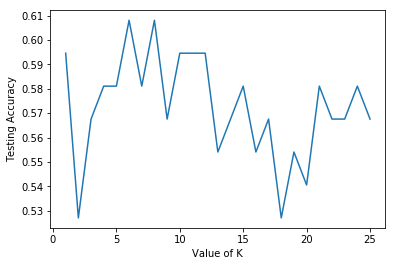

In [4]:
def plot_KNN_scores():
    """Plots the relationship between K-values and testing accuracy"""
    
    k_range = range(1, 26)
    scores = []
        
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(knn.score(X_test, y_test))
    
    # Plot
    plt.plot(k_range, scores)
    plt.xlabel("Value of K")
    plt.ylabel("Testing Accuracy")
    plt.rcParams["figure.figsize"] = [12.0, 10.0]

plot_KNN_scores()

## Decision Tree Classifier & Visualization

In [5]:
from sklearn.tree import DecisionTreeClassifier

X = heart.drop(columns='heart_disease')
y = heart.heart_disease

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create classifier object
dtree = DecisionTreeClassifier(random_state=0)

# Train
model = dtree.fit(X_train, y_train)

acc = dtree.score(X_test, y_test)

print("Decision Tree Accuracy Score: ", acc)

Decision Tree Accuracy Score:  0.7567567567567568


In [6]:
# Viasualize
import pydotplus
from IPython.display import Image
from sklearn import tree

# Create DOT data
dot_data = tree.export_graphviz(dtree, feature_names=heart.drop(columns='heart_disease').columns.values, class_names="01")

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Save graph
graph.write_png("decision_tree.png")

True

![Decision Tree Visualization](decision_tree.png)

## Random Forest Classification

In [7]:
from sklearn.ensemble import RandomForestClassifier
from statistics import mean

def randomforest(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    randomforest = RandomForestClassifier()
    model = randomforest.fit(X_train, y_train)
    epochs = 500
    score = []
    
    while epochs > 0:
        score.append(randomforest.score(X_test, y_test))
        epochs -= 1
    
    return mean(score)

rf_score_one = randomforest(X, y)
print("Random Forest Accuracy Score: ", rf_score_one)

C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy Score:  0.7432432432432432


### Identifying important features of Random Forest model

In [8]:
features=heart.columns
X = heart.drop(columns='heart_disease')
y = heart.heart_disease
rfc = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = rfc.fit(X_train, y_train)

featureMatrix = model.feature_importances_

for n in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = rfc.fit(X_train, y_train)
    featureMatrix = np.vstack((featureMatrix, model.feature_importances_))
    
mean_importances = np.mean(featureMatrix, axis=0)

print(mean_importances)

C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.08948805 0.03580045 0.12727989 0.07343022 0.08062002 0.00981282
 0.02075732 0.12834573 0.05449713 0.11076152 0.0505954  0.11980146
 0.09881001]


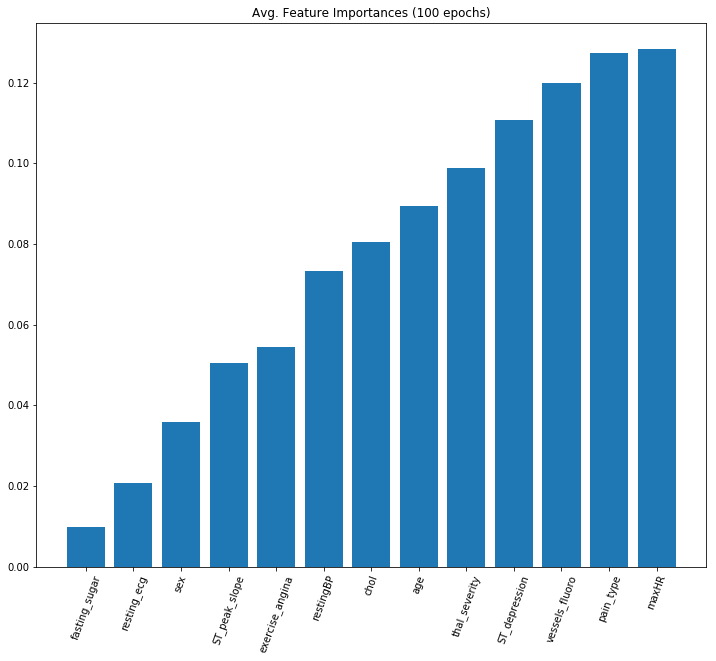

In [9]:
# Sort importances
indices = np.argsort(mean_importances)

# Rearrange features so they match the sorted features
names = [heart.columns[i] for i in indices]

# Plot
plt.figure()
plt.title("Avg. Feature Importances (100 epochs)")
plt.bar(range(len(indices)), mean_importances[indices])
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=70)
plt.show()
plt.rcParams["figure.figsize"] = [12.0, 10.0]

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

X = heart.drop(columns='heart_disease')
y = heart.heart_disease

X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

lg_score_one = logreg.score(X_test, y_test)
print("LogReg Accuracy Score: ", lg_score_one)

LogReg Accuracy Score:  0.7567567567567568


C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# III. Feature Engineering

## Create new feature based on those with higher than average maximum heart rates [(AHA)](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates)

In [11]:
# The American Heart Associated defines higher than avgerage heart rate as any heart rate greater than 220 minus one's age

# Create a list of rows containing only those with higher than average maximum heart rates
def maxHR_above_avg():
    above_avg = []
    
    for index, row in heart.iterrows():
        if (220 - row['age'] < row['maxHR']):
            above_avg.append(1)
        else:
            above_avg.append(0)
    
    return above_avg

# Create a new column in heart dataframe
heart['maxHR_above_avg'] = maxHR_above_avg()

heart.head()

,age,sex,pain_type,restingBP,chol,fasting_sugar,resting_ecg,maxHR,exercise_angina,ST_depression,ST_peak_slope,vessels_fluoro,thal_severity,heart_disease,maxHR_above_avg
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


# IV. Modeling II

## Updated Decision Tree Visualization

In [12]:
from sklearn.tree import DecisionTreeClassifier

X = heart.drop(columns='heart_disease')
y = heart.heart_disease

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create classifier object
dtree = DecisionTreeClassifier(random_state=0)

# Train
model = dtree.fit(X_train, y_train)

acc = dtree.score(X_test, y_test)

print("Decision Tree Accuracy Score: ", acc)

Decision Tree Accuracy Score:  0.7567567567567568


In [13]:
features = heart.drop(columns='heart_disease')
target = heart.heart_disease

# Create classifier object
dtree = DecisionTreeClassifier(random_state=0)

# Train
model = dtree.fit(features, target)

# Create DOT data
dot_data = tree.export_graphviz(dtree, feature_names=heart.drop(columns='heart_disease').columns.values, class_names="01")

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Save graph
graph.write_png("updated_decision_tree.png")

True

![Decision Tree Visualization](updated_decision_tree.png)

## Updated Logistic Regression Score

In [14]:
from sklearn.linear_model import LogisticRegression

X = heart.drop(columns='heart_disease')
y = heart.heart_disease

X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

lg_new_score = logreg.score(X_test, y_test)

print(" New Score: ", lg_new_score, " \n \t versus \n Old score: ", lg_score_one)

 New Score:  0.8513513513513513  
 	 versus 
 Old score:  0.7567567567567568


C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
# Train Multiclass Classifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

features = heart.drop(columns='heart_disease')
target = heart.heart_disease
class_names = heart.columns.values.tolist()

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, random_state=1)

# Create one-vs-rest logistic regression object
logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")

# Train model
model = logistic_regression.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred, target_names=['No Heart Disease', 'Heart Disease']))

                  precision    recall  f1-score   support

No Heart Disease       0.81      0.59      0.69        37
   Heart Disease       0.68      0.86      0.76        37

       micro avg       0.73      0.73      0.73        74
       macro avg       0.75      0.73      0.72        74
    weighted avg       0.75      0.73      0.72        74



C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 69.0, 'True Label')

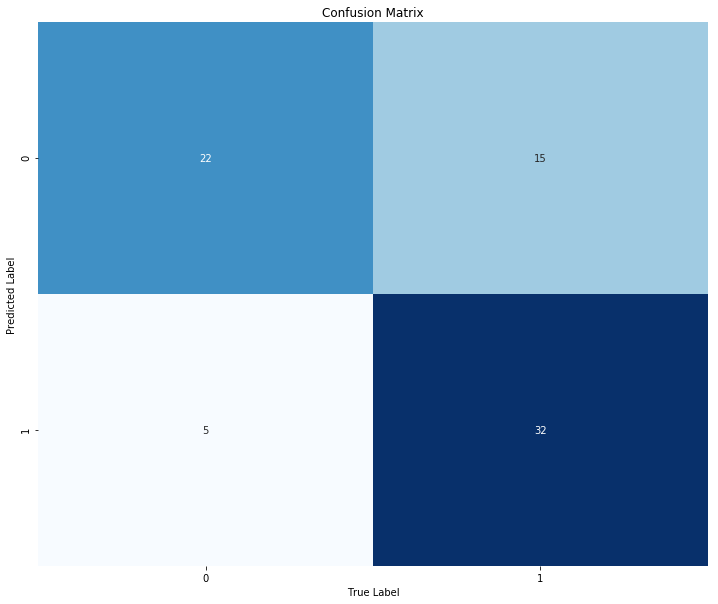

In [16]:
# Visualize performance with confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = logistic_regression.fit(X_train, y_train).predict(X_test)

matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

df = pd.DataFrame(matrix)

sns.heatmap(df, annot=True, cbar=None, cmap="Blues")
plt.rcParams["figure.figsize"] = [12.0, 10.0]
plt.title("Confusion Matrix")
plt.ylabel("Predicted Label")
plt.xlabel("True Label")

C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


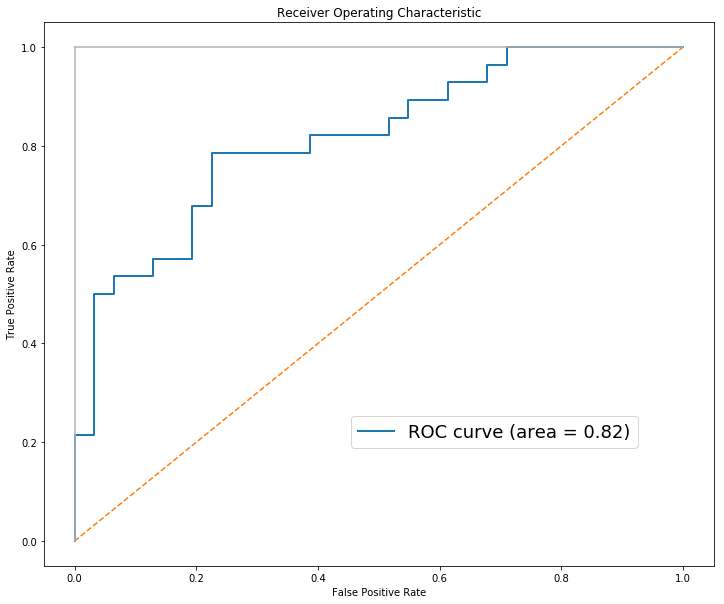

In [17]:
# Plot ROC Curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.2, random_state=1)

logistic_regression.fit(X_train, y_train)

y_scores = logistic_regression.predict_proba(X_test)[:, 1]

falsePos, truePos, threshold = roc_curve(y_test, y_scores)

plt.plot(falsePos, truePos, lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_scores))
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c=".7")
plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc=4, bbox_to_anchor=(0.90, 0.2), fontsize=18)
plt.rcParams["figure.figsize"] = [12.0, 10.0]